# 1. 언어 모델

: 단어 시퀀스에 확률을 할당하여 이전 단어들에 기반한 자연스러운 다음 단어를 예측하는 모델. 

- 예) 구글 검색 자동완성: 타이핑한 단어를 기반으로 다음으로 올 단어를 띄워 줌!
- 언어 모델은 크게 통계 기반, 인공 신경망 기반으로 나뉜다.

## 통계기반 모델

: 문장의 등장 빈도를 기반으로 확률을 계산함. 

: 상대적으로 낮은 복잡도, 빠른 학습 속도

: n-gram, perplexity 등

### SLM (Statistic Language Model)

= 통계 기반 언어 모델

- 분포 가설(Distributional Hypothesis): 비슷한 문맥에서 함께 나타나는 단어들은 비슷한 의미를 가진다. ⇒ 같이 등장하는 단어를 통해 그 의미를 파악할 수 있다.
- 조건부 확률 : $P(B|A) = P(A, B) / P(A)$, 두 확률 P(A)와 P(B)가 있을 때, A가 일어났다는 전제 하에 B가 일어날 확률
    - ‘오늘’ -(확률)→ ‘날씨가’ -(확률)→ ‘좋다’
    - $P(\text{오늘}, \text{날씨가}, \text{좋다}) = P(\text{오늘}) \times P(\text{날씨가}|\text{오늘}) \times P(\text{좋다}|\text{오늘}, \text{날씨가})$ 의 확률이 높을수록 ‘자연스럽다’고 판단함!
- 카운트기반: 이전 단어 시퀀스의 등장 빈도를 통해 다음 단어의 확률을 계산 ($P(좋다 | 오늘 날씨가)$)
    - 카운트 기반의 한계: 희소 문제 = 데이터가 부족해 모델링 불가 (분모 또는 분자가 0)

### n-gram

: SLM 기반, 일부 단어만 참고해 희소 문제를 완화함

- n의 값에 따라 unigram, bigram, trigram, 4-gram이 됨!
- (예측해야 하는 단어 이전) n-1개의 단어를 참고함
- 희소 문제를 일부 해결했지만 완벽하게 해소 X. + 문맥 파악 불가
    - 이같은 한계점이 인공신경망 기반 언어 모델 개발로 이어짐

### PPL(Perplexity)

: 언어 모델의 성능을 빠르고 정량적으로 평가하기 위한 지표

: 언어 모델이 특정 문장을 얼마나 혼란스러워(=perplexed) 하는지를 나타내는 수치

- PPL이 낮을수록 좋음 = 덜 혼란스러워함 = 언어 모델의 성능이 좋다!
- PPL의 정의와 수식:
    - 문장 W의 확률에 역수 → 문장의 단어 수(n)로 제곱근
        
        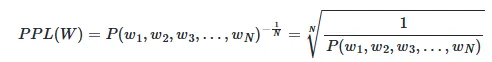
        
    - $P(W)$이 높을 수록(=자연스럽다고 판단할수록) PPL값이 낮아지는 구조임
- PPL에 영향을 주는 요인들
    - 문장 W의 희소성 : 희소함 = 훈련에서 적게 봤을 수록 혼란스러워짐 = PPL이 커짐
    - 문장의 길이: n이 클수록 함께 보는 단어들이 많아짐 = 희소한 부분이 있더라도 흔한/예측하기 쉬운 단어가 함께 있어 PPL이 낮아짐
- 통계적 언어 모델은 근본적으로 희소문제를 가지고 있어 PPL 수치가 높을 수밖에 없음. → 딥러닝 기반 모델은 관계 학습, 일반화 능력을 학습해 더 유연하게 대처 가능함.

## 인공 신경망/딥러닝 기반 언어모델

: 단어를 벡터 형태의 표현으로 만들어 신경망 모델을 이용, 다음 단어를 예측

: 계산 복잡도 높음. 많은 컴퓨팅 자원을 필요로 함

: RNN 계열(rnn/lstm/gru), transformer 계열(BERT, GPT 등)

### LLM(Large Language Model)

: 대규모 언어 모델. 방대한 양의 데이터 학습을 기반으로 인간의 언어를 이해, 생성, 요약하는 인공지능 모델

: [발전 과정] 국소적 이해를 위한 SLM → 좀더 정확한 NLM → BERT 같은 전이학습용 PLM → 대형 PLM, LLM

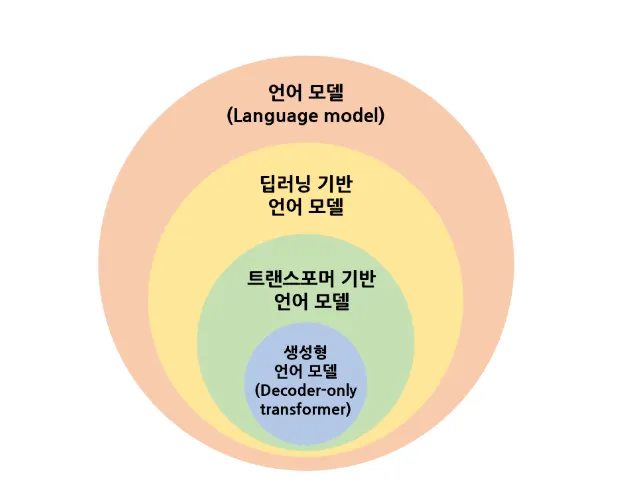

- LLM의 단계
1. 대규모 학습(training): 수십억 개의 문장을 기반으로 데이터를 학습. 단어 간 관계, 문맥, 문법, 패턴 등을 스스로 학습함. 
2. 예측 및 생성(prediction & generation): 학습이 완료된 LLM이 질문/지시(prompt)를 받으면 학습 내용을 기반으로 다음에 올 단어를 순차적으로 예측하여 응답을 생성함. 
- LLM 사용 사례: 텍스트 생성, 기계 번역, 질의응답, 감성 분석 등

### BERT

: Bidirectional Encoder Representations from Transformers

: 앞뒤 문맥을 동시에 고려해 + 입력값을 벡터로 바꾸어 주는 + 딥러닝 모델

: 트랜스포머의 인코더 부분을 활용해 만든 양방향 언어 모델

- 문장 이해 능력이 뛰어나(=인코더) 구글 검색, 챗봇, 음성비서, 이메일, 고객 서비스 등에 활용
- BERT의 구조: transformer의 인코더를 여러 층 쌓아 올린 구조임
    - token(단어 의미) → segment(문장 구분) → position(위치) embedding으로 이루어짐
- 사전학습 1. Masked Language Model(MLM)
    - 문장 일부를 mask 해둔 뒤 가려진 단어를 맞추는 방식의, 빈칸 채우기 학습.
    - 훈련 문장 중 약 15%를 다음과 같은 방식으로 마스킹: 80%는 mask로, 10%는 랜덤 단어로, 10%는 그대로 유지
    - 다양한 마스킹 방법으로 실제 미세조정용 task에는 없는 mask 토큰에 의존하지 않도록 제어함.
    - 양방향 단어의 정보를 바탕으로 mask에 들어갈 단어를 예측하도록 하여 이해 기반 학습
- 사전학습 2. Next Sentence Prediction(NSP)
    - 두 문장이 서로 이어지는지 여부(IsNext, NotNext) label을 부여
    - 문장 간 관계를 파악하도록 함
- MLM, NSP의 두가지 사전학습 후, 각 task에 맞는 형태로 fine-tuning하여 활용함
    - RoBERTa: 거대 데이터셋, nsp 제거, 동적 마스킹으로 bert를 개선, 성능을 높인 모델
    - ALBERT: BERT의 경량화 버전. 레이어 간 파라미터 공유, 임베딩 행렬 분해

### GPT

: Generative Pre-trained Transformer

- gpt-3 논문에서 zero shot, one-shot, few-shot 실험, 프롬프팅 도입.
- gpt의 구조
    - gpt2의 구조가 지금까지도 쭉 사용되어 옴. transformer의 디코더 부분.
    
    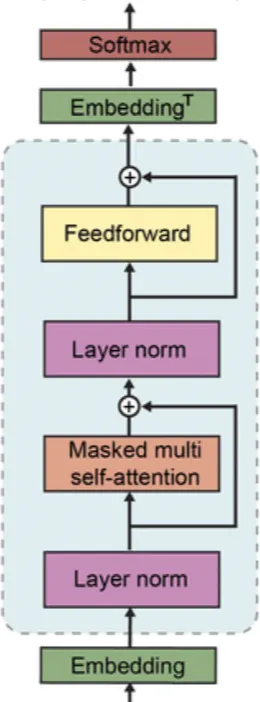
    
- LLM의 한계: 환각 문제, 업데이트 비용

### RAG

: 비효율적인 재학습 자원 소모와 환각 현상을 해결하기 위해 등장함

: Retrieval Augmented Generation

- RAG의 구조
    1. Query Encoder: 사용자의 질문 이해, 인코딩
    2. Knowledge Retriever: 인코딩된 질문을 바탕으로 외부 지식 베이스에서 관련 정보를 검색. 위키, 뉴스 기사, 전문 서적 등
    3. Knowledge-Augmented Generator: 검색한 지식을 기반으로 답변을 생성. 
- RAG의 장점
    - 풍부한 정보 제공
    - 실시간 정보 반영
    - 환각 방지
- CAG(Credibility Aware Generation): rag의 한계(신뢰성 낮은 정보 가져오는 문제)를 해결하기 위해 문서의 신뢰도를 판단하여 활용하는 모델

### Langchain

: LLM + RAG 모델 파이프라인을 쉽게 구성하도록 도와주는 프레임워크!

- Langchain의 특징:
    - 추상화: 각종 작업을 간결하게 표현, 간소화해줌. (ex. 문서 불러오기-임베딩-저장-…)
    - 표준화: 비슷한 기능을 갖추고 있는 요소들을 똑같은 형식을 갖춘 컴포넌트로 표준화해줌 (다양한 모델들을 하나의 형식으로 통일!! & 원본 데이터들을 표준화된 컴포넌트로 관리)
    - 체이닝: 자주 활용하는 주요 컴포넌트를 쉽게 연결해서 로직을 쉽게 구성
- LangGraph
    - 선형적인 체인 구조를 가진 랭체인 ⇒ 결과가 마음에 들지 않으면 처음부터 다시
    - langgraph는 비선형적인 작업 형태를 가지고 cycle, loop를 만들 수 있음.
- LangSmith
    - llm 기반 애플리케이션을 위한 통합 개발/운영 플랫폼!
    - 디버깅, 추적/ 테스트 및 평가/ 모니터링/ 프롬프트 허브 기능

## sLM

: small Language Model

: 자연어 콘텐츠를 처리/이해/생성할 수 있는 모든 AI 모델. LLM보다 규모와 범위 측면에서 작음

- 모델 압축
    - 가지치기: 신경망에서 중요도가 낮거나 불필요한 매개변수를 제거
    - 양자화: 고정밀 데이터를 저정밀 데이터로 변환하는 것.
    - 지식 증류: 사전 학습된 교사 모델의 학습 내용을 학생 모델로 이전 - 기본 추론 과정을 모방하도록 학습. 더 큰 모델의 지식을 작은 모델로 증류.
- sLM의 예: Llama 3, Phi-3, Gemma 등
- sLM의 장단점
    - 프라이버시, 비용 절감, 효율성, 맞춤화
    - 편향과 성능 저하, 제한된 일반화, 환각, 성능과 용량의 한계
        - 성능 문제의 경우 학습 단계(미세조정, 지식 증류)/추론 단계(RAG, 결합 추론)/모델 압축으로 나누어 완화할 수 있음
- sLM과 LLM의 결합(결합 추론): SMART 프레임워크/ 어려운 문제를 풀 때 부분적으로만 LLM에게 선택적으로 도움 받아 해결하는 것.
    - sLM이 문제 해결 시도 → 각 단계 평가/스코어링 → 어려운 부분만 LLM이 수행
    - LLM 수준의 정확도 + LLM 토큰 사용량 절약 가능!

# 2. 생성 모델

## 분류 모델 vs 생성 모델

: 생성 모델은 주어진 학습 데이터를 기반으로 학습 데이터의 분포를 따르는 유사한 데이터를 생성하는 모델이다. 

- 지금까지의 신경망 모델은 대부분 분류 모델, 샘플에는 정답 레이블이 존재함
- BUT: 생성 모델은 입력 데이터의 확률 분포를 알고자 함.

## 생성 모델의 분류

- 명시적 확률밀도 모델: 학습 데이터의 분포를 기반으로 생성
    - 정확히 계산 가능한 모델: 확률 분포를 직접적으로 표현, 우도를 계산할 수 있는 경우(NADE, MADE, Autoregressive 모델)
    - 근사적 likelihood 기반: 정확한 우도 계산이 어렵기에 근사하는 방법(VAE, 볼츠만 머신)
- 암시적 확률밀도 모델: 학습 데이터의 분포와 상관없이 생성
    - GSM, GAN

### AE (Auto Encoder)

: 오토인코더. 입력과 동일한 출력을 만드는 것을 목적으로 함. 

: 차원 축소, 특징 추출, 노이즈 제거, 이상 탐지 등. 노이즈가 있는 데이터를 복원하거나 특성 학습에 많이 사용됨. 

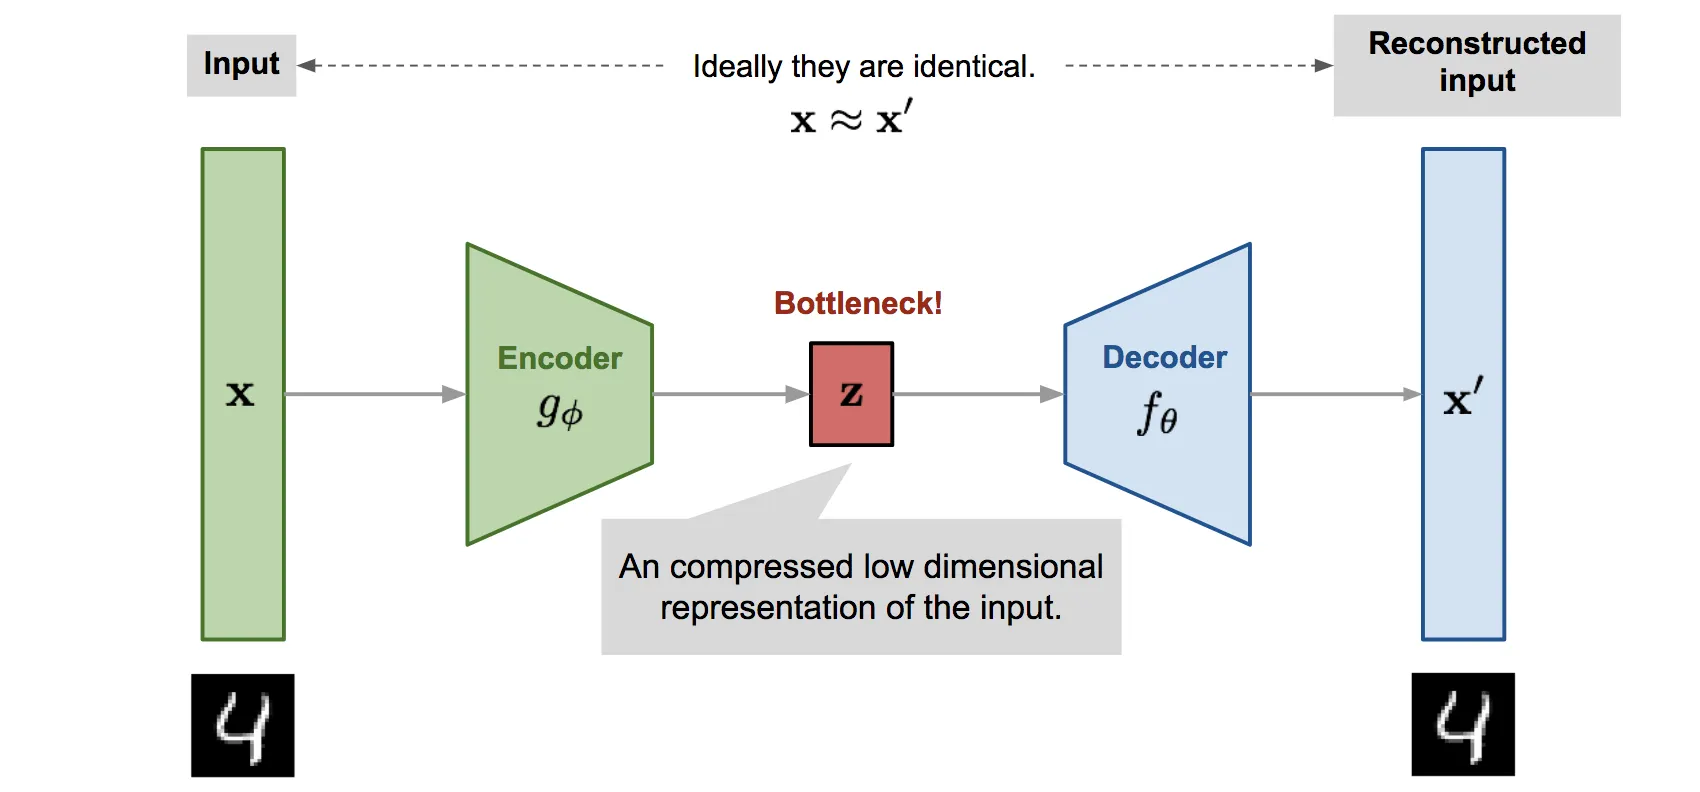

- 인코더(고차원 입력 데이터를 잠재 표현으로 변환)과 디코더(잠재 표현을 풀어 입력을 재복원) 구조로 구성되어 있음.
- 잠재 표현: 원본 데이터가 저차원으로 압축, 함축된 정보를 저장하는 벡터(z)
- ⇒ 인코더에 들어가는 입력 데이터 x와 디코더가 출력하는 데이터 x’가 같아지도록 훈련해야 함.

### VAE(Variational Auto Encoder)

: 확률적 오토인코더. 랜덤 노이즈로부터 원하는 영상을 얻기 위해 활용

: 데이터를 잠재 공간으로 인코딩 → 잠재 공간에서 데이터를 디코딩 → 유사한 결과를 생성

: 이미지 생성, 텍스트 생성, 신호 처리, 이미지 보간 등에 활용됨

- AE는 인코더가 목적, 인코더 학습을 위해 디코더를 사용하는 것
- VAE는 디코더가 목적. 디코더 학습을 위해 인코더를 붙임
- VAE는 입력값을 재구성해 하나의 숫자로 나타내는게 X. 가우시안 확률 분포에 기반한 확률값으로 나타남. (평균, 분산)
    
    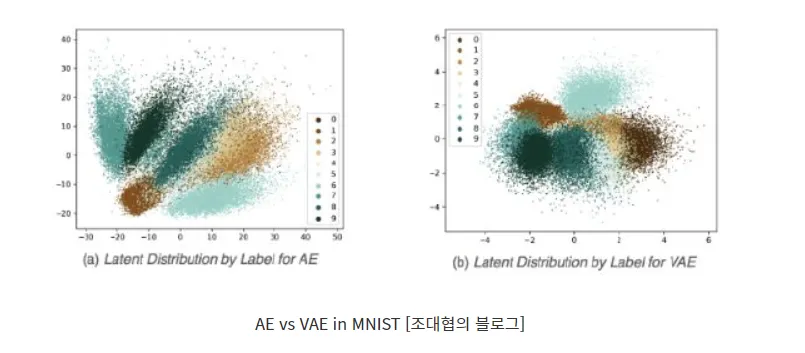
    
- VAE의 구조:
    
    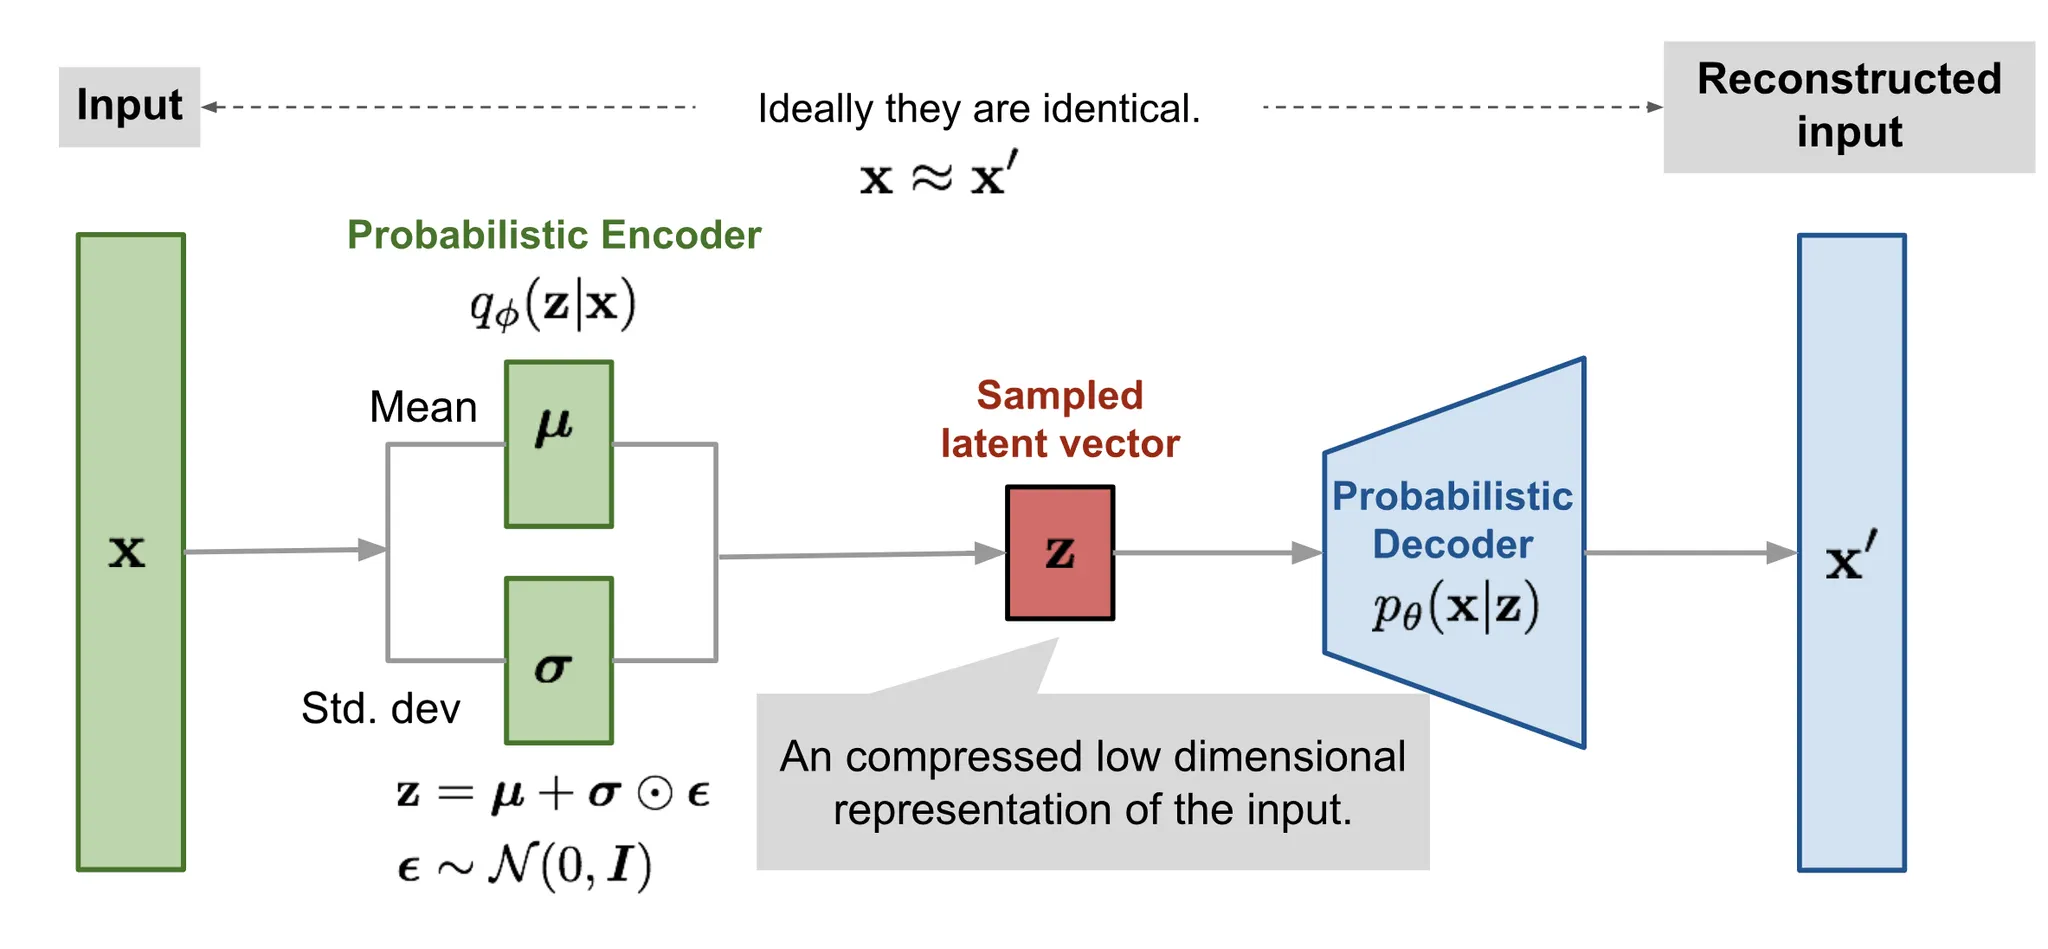
    
    - 인코더(고차원 입력 데이터를 분포, 표준편차로 변환) → 잠재 벡터(함축된 정보 저장) → 디코더(잠재 표현을 풀어서 입력을 재복원)

### GAN(Generative Adversarial Network)

: 생성적 적대 신경망. 생성사 신경망 ↔ 판별자 신경망이 적대적으로 경쟁하며 훈련, 작업을 정교하게 만들어가는 모델

: 생성자: 진짜 분포에 가까운 가짜분포를 생성 ↔ 판별자: 표본이 가짜 or 진짜인지 결정

⇒ 실제 데이터 분포에 가까운 데이터를 생성하는 것이 목표. 판별기가 한 쪽으로 판단하지 못하는 경계를 파악

: 이미지 생성, 영상 합성 등에 사용됨

- GAN의 구조: 노이즈 → 생성자 → 가짜 결과물 생성 ⇒ 판별자가 가짜/진짜 중 판별

    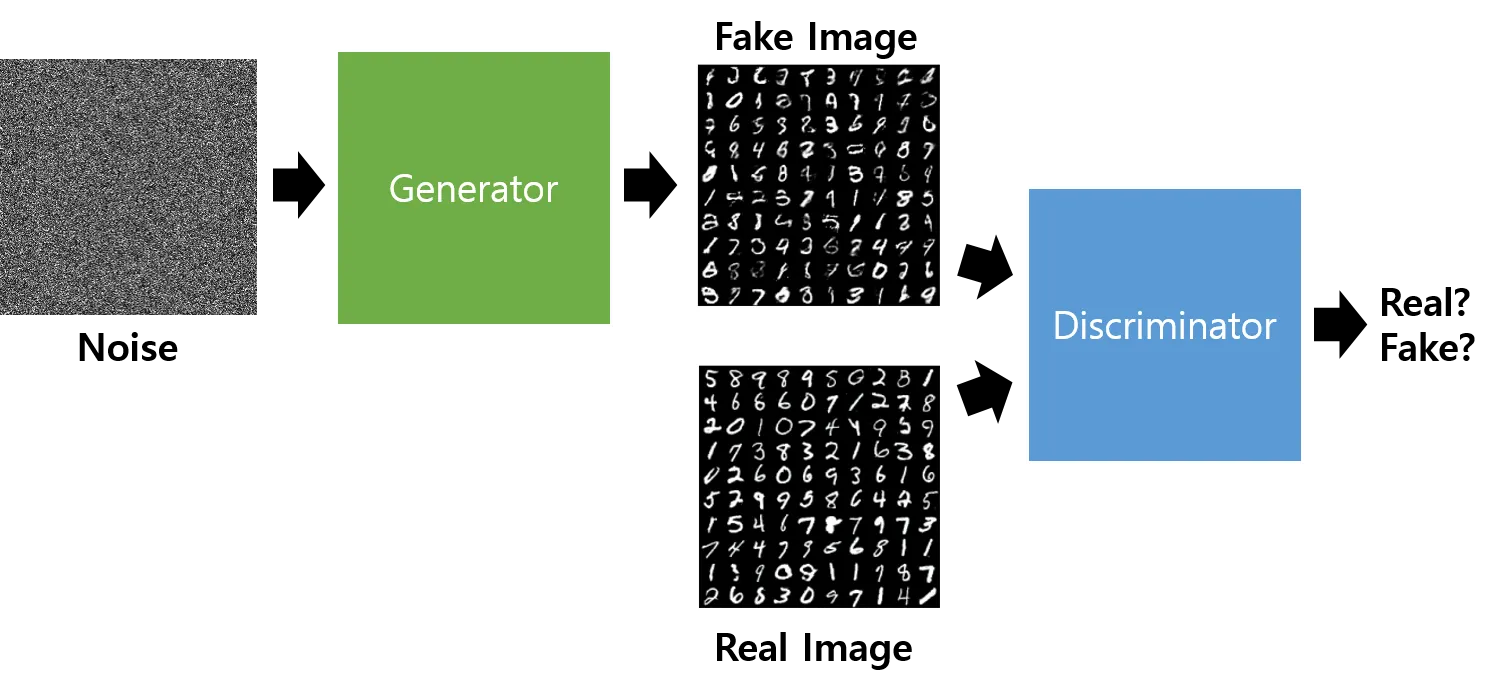

- GAN 적용 사례:
    - NVIDIA 가짜 이미지 생성: 얼굴, 침실, 화분, 소파 등
    - 가짜 오바마 연설 영상
    - 페이스북 real eye opener: 눈을 감은 사진에 가짜 눈을 합성. 눈 뜬 사람 사진으로 합성
- GAN의 장단점
    - 진짜같은 가짜 생성 가능 (악용 가능성도 존재함)
    - 학습이 불안정: 에폭이 늘어날수록 진동이 커지고 loss가 줄어들지 않아 안정화가 되지 않음

### 확산 모델(Diffusion Model)

: 입력 이미지에 여러 겹의 노이즈를 추가, 제거함으로써 입력 이미지와 유사한 확률 분포를 가진 결과 이미지를 생성하는 모델

: forward-reverse 단계를 거진 결과 이미지를 입력 이미지의 확률 분포와 유사하게 만드는 것. 

- 순확산
    
    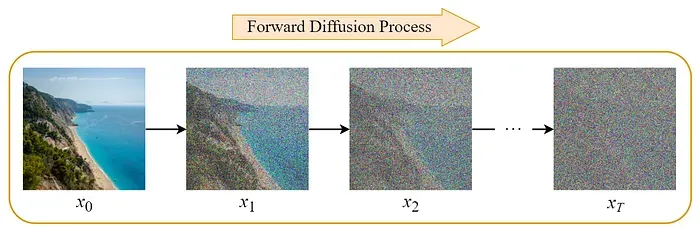
    
    - 데이터에 점진적으로 노이즈를 추가하는 과정
    - 원본 데이터 → 노이즈 추가 → 완전한 노이즈 데이터
- 역확산
    
    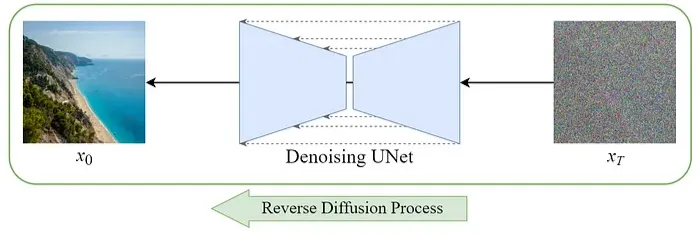
    
    - 노이즈 데이터에서 원본 데이터를 재구성하는 과정
    - 노이즈 데이터 → 노이즈 제거 → 원본 데이터 복원